https://github.com/KPSS2017/Technological-Innovation-Resource-Allocation-and-Growth-Extended-Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
plt.style.use("ggplot")

In [2]:
def plot_cat (variable, name_var):
    unique = np.unique(variable, return_counts=True)
    label = unique[0]
    number = unique[1]/unique[1].sum()
    plt.figure(figsize=(13,5))
    plt.bar(np.arange(len(label)),number, label=f"Sample analysis is {len(df)}")
    #plt.plot(number, label=f"Sample analysis is {len(df)}")
    plt.xlabel("Variable's labels")
    plt.ylabel("Relative Frequency")
    plt.xticks(np.arange(len(label)),label,rotation = 90)
    plt.title(f"Plot the variable {name_var}")
    plt.legend()
    plt.show()

In [3]:
PATH_FIND = re.compile(r".*repository.")
rep_path = re.search(PATH_FIND,os.getcwd()).group()

In [4]:
#os.chdir(os.path.join(rep_path,"2 analysis"))

In [5]:
df = pd.read_csv(os.path.join(rep_path,"1 csv","patent_data_RAW.csv"),sep =",").drop(["id","uuid","patent_id","patent_num",'Unnamed: 0'],axis=1)
   # r"C:\Users\alessandro.laudisa\OneDrive - Accenture\Desktop\Tesi_workspace\repository\csv\patent_data_RAW.csv", sep =",").drop(["id","uuid","patent_id","patent_num"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091994 entries, 0 to 2091993
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   type           object 
 1   number         int64  
 2   country        object 
 3   date           object 
 4   abstract       object 
 5   title          object 
 6   kind           object 
 7   num_claims     int64  
 8   filename       object 
 9   withdrawn      int64  
 10  section_id     object 
 11  subsection_id  object 
 12  group_id       object 
 13  subgroup_id    object 
 14  category       object 
 15  xi_real        float64
 16  xi_nominal     float64
 17  cites          float64
 18  permno         float64
 19  issue_date     object 
 20  filing_date    object 
dtypes: float64(4), int64(3), object(14)
memory usage: 335.2+ MB


In [7]:
df.columns

Index(['type', 'number', 'country', 'date', 'abstract', 'title', 'kind',
       'num_claims', 'filename', 'withdrawn', 'section_id', 'subsection_id',
       'group_id', 'subgroup_id', 'category', 'xi_real', 'xi_nominal', 'cites',
       'permno', 'issue_date', 'filing_date'],
      dtype='object')

# Univariate analysis

## Categorical

In [8]:
cat = df.select_dtypes(object)


### Adjustments

In [9]:
cat_analysis = cat [["type","kind","section_id","group_id","category","issue_date"]]

In [10]:
cat_analysis["issue_date_form"] = cat_analysis.issue_date.apply(lambda x: x[-4:])

C:\Users\laudi\AppData\Local\Temp\ipykernel_2532\2357422835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_analysis["issue_date_form"] = cat_analysis.issue_date.apply(lambda x: x[-4:])


In [11]:
cat_analysis.drop("issue_date",axis=1, inplace=True)

C:\Users\laudi\AppData\Local\Temp\ipykernel_2532\1779169804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_analysis.drop("issue_date",axis=1, inplace=True)


In [12]:
cat_analysis["withdrawn"] = df.withdrawn.astype(str)

C:\Users\laudi\AppData\Local\Temp\ipykernel_2532\98830816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_analysis["withdrawn"] = df.withdrawn.astype(str)


In [13]:
vtype = cat_analysis.type
vkind = cat_analysis.kind
vsection = cat_analysis.section_id
vgroup = cat_analysis.group_id
vcategory = cat_analysis.category
vdate = cat_analysis.issue_date_form
vwithdrawn = cat_analysis.withdrawn

In [14]:
vsection

0          G
1          B
2          B
3          B
4          G
          ..
2091989    G
2091990    G
2091991    E
2091992    G
2091993    G
Name: section_id, Length: 2091994, dtype: object

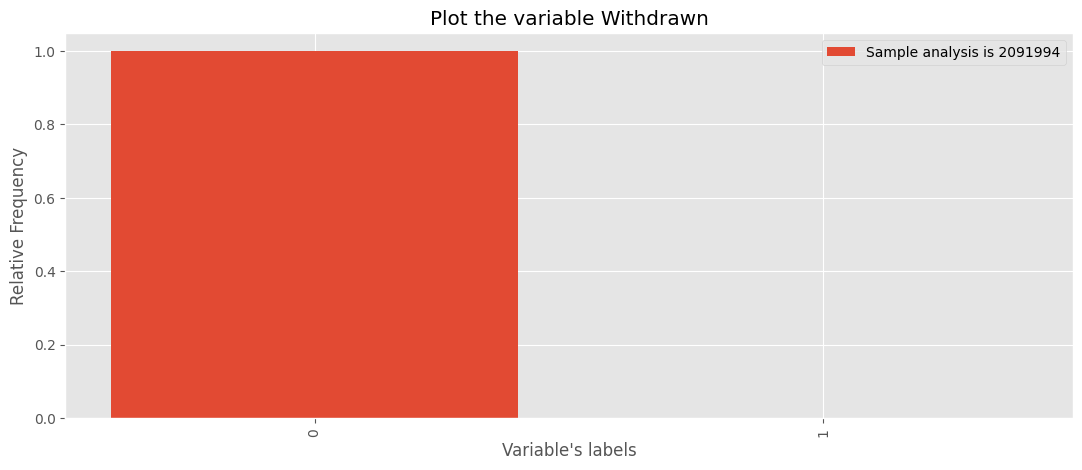

In [15]:
plot_cat(vwithdrawn,"Withdrawn")


In [16]:
def plot_cat_time (variable, name_var):
    unique = np.unique(variable, return_counts=True)
    label = unique[0]
    number = unique[1]#/unique[1].sum()
    number2 =(pd.Series(number) - pd.Series(number).shift(1) )/pd.Series(number).shift(1)
    
    # print(number , number2)
    fig , ax = plt.subplots(2,1,figsize=(12,15))
    #plt.figure(figsize=(13,5))
    ax[0].plot(np.arange(len(label)),number, label=f"Sample analysis is {len(df)}")
    #plt.plot(number, label=f"Sample analysis is {len(df)}")
    ax[0].set_xlabel("Years")
    ax[0].set_ylabel("Absolute Frequency")
    ax[0].set_xticks(np.arange(len(label)),label,rotation = 90)
    ax[0].set_title(f"Plot the variable {name_var}")
    ax[0].legend()
    
    
    ax[1].plot(np.arange(len(label)),number2, label=f"Sample analysis is {len(df)}", color = "black")
    ax[1].set_xlabel("Years lag 1")
    ax[1].set_ylabel("Relative differential value")
    ax[1].set_xticks(np.arange(len(label)),label,rotation = 90)
    ax[1].set_title(f"Plot the variable {name_var} shifted by 1 year")
    ax[1].axhline(0, color = "r", label= "Point of stationarity")
    ax[1].legend()
    

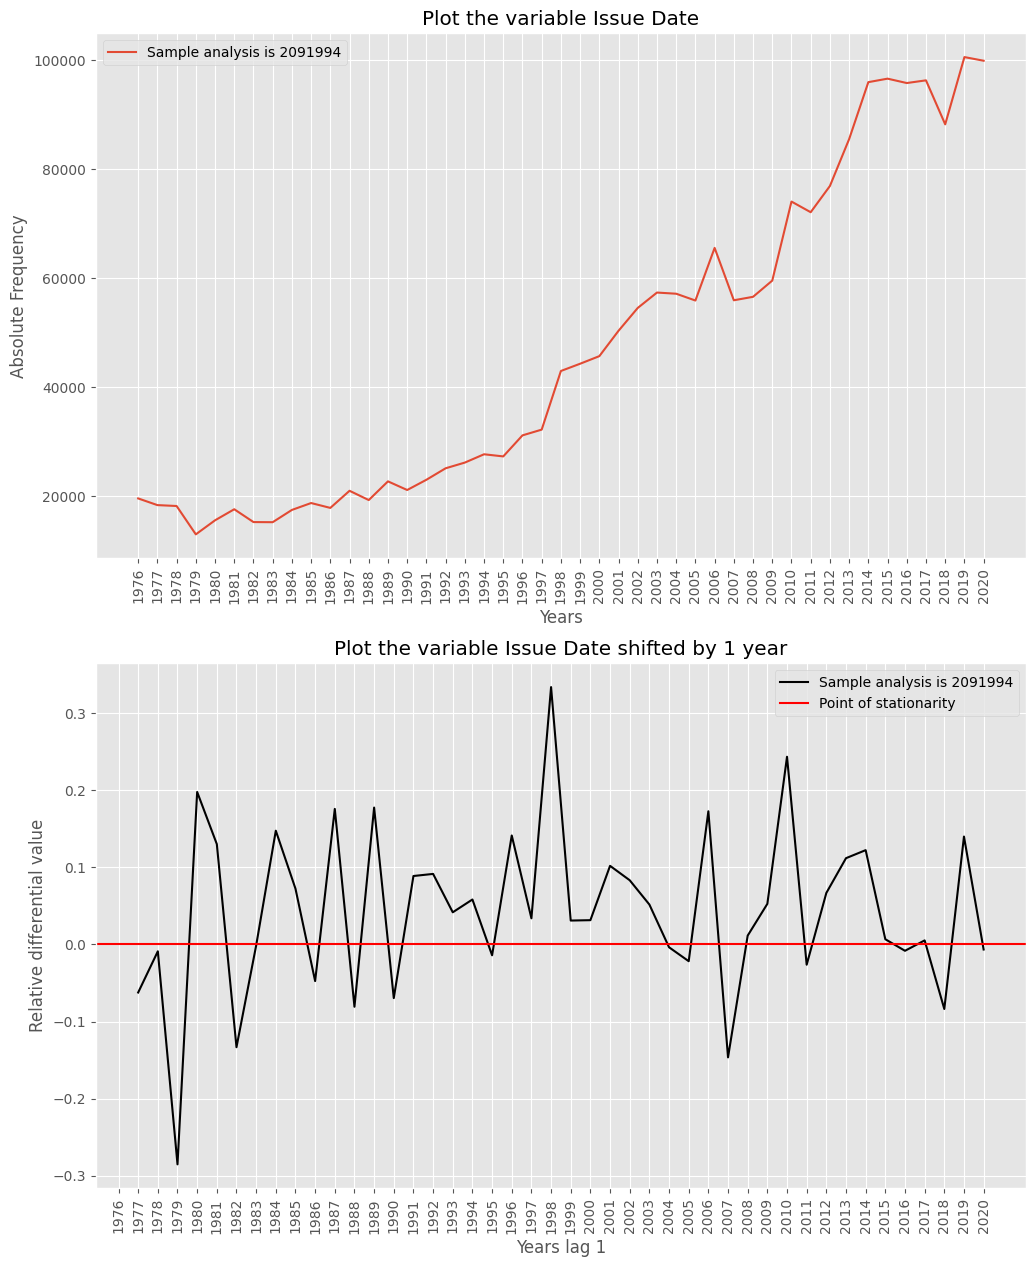

In [17]:
plot_cat_time(vdate, "Issue Date")

## Numerical

In [33]:
num = df.drop(cat.columns,axis=1)

In [34]:
num.columns

Index(['number', 'num_claims', 'withdrawn', 'xi_real', 'xi_nominal', 'cites',
       'permno'],
      dtype='object')

In [35]:
claims = num.num_claims
withdrawn = num.withdrawn
xi_real = num.xi_real
xi_nominal = num.xi_nominal
cites = num.cites
permno = num.permno

In [36]:
pd.set_option('display.float_format','{:.2f}'.format)

In [37]:
os.getcwd()

'c:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\2 analysis'

In [38]:
des = cites.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])
des#.to_csv(f"{des.name}.csv")


count   2091994.00
mean         13.78
std          40.65
min           0.00
1%            0.00
10%           0.00
25%           0.00
50%           3.00
75%          12.00
90%          33.00
99%         159.00
max        4347.00
Name: cites, dtype: float64

In [39]:
des["50%"]

3.0

In [17]:
def plot_hist(data, bins = 20, xlim_ = 200, density = True):
    
    stat = data.describe()
    
    inter_diff = stat["75%"]-stat["25%"]
    
    #https://chartio.com/learn/charts/box-plot-complete-guide/#:~:text=Construction%20of%20a%20box%20plot%20is%20based%20around,in%20the%20middle%2C%20dividing%20the%20data%20in%20half.
    
    max_value_box =  stat["75%"]+1.5*inter_diff
    
    count_out = np.sum(data>max_value_box)
    
    fig, ax = plt.subplots(1,3,figsize= (15,5))

    ax[0].hist(data,bins=bins, label = "Histogram", density=density)
    sns.kdeplot(data,multiple="stack", label = "Kdensity", ax = ax[0])
    if type(xlim_) == int:
        ax[0].set_xlim((0,xlim_))
        ax[0].set_xlabel(f"x value limited at {xlim_}")
    ax[0].legend()
    ax[0].set_title(f"Histogram and density {data.name}")
    
    ax[1].boxplot(data)
    ax[1].set_title(f"Boxplot {data.name}")
    ax[1].set_xticks([])
    
    ax[2].boxplot(data)
    ax[2].set_ylim((0,max_value_box+0.01))
    ax[2].set_xticks([])
    ax[2].set_title(f" Boxplot of {data.name} with {count_out} outliers")
    

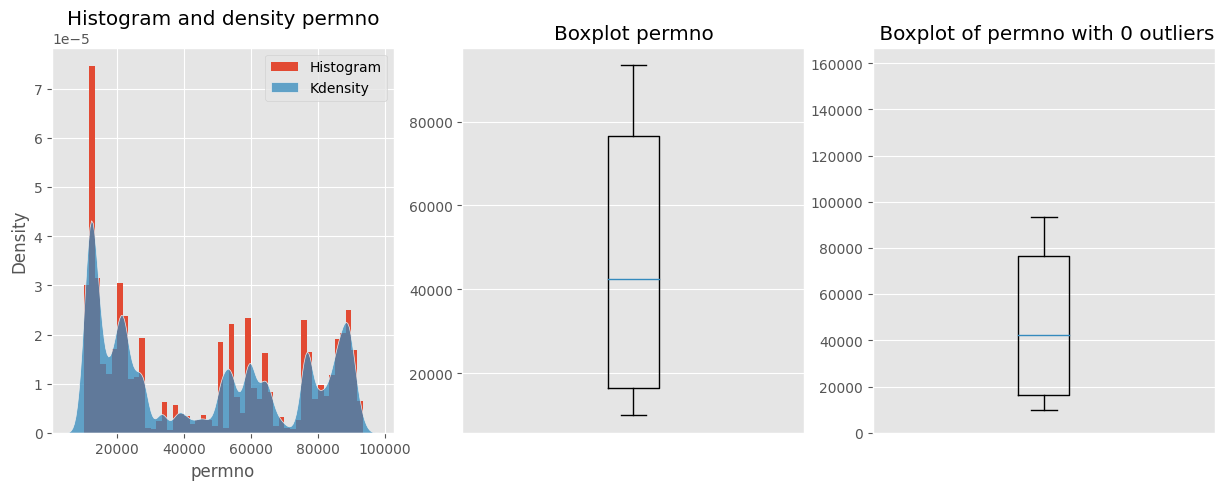

In [39]:
plot_hist(permno,bins=50,xlim_="no",density=True)

## Bivariate Analysis

### Categorical vs Categorical

In [56]:
use = vkind.loc[lambda x : (x != "S") & (x != "E") & (x != "P")].index #removed S E P because were too insignificant respect to A B1 B2

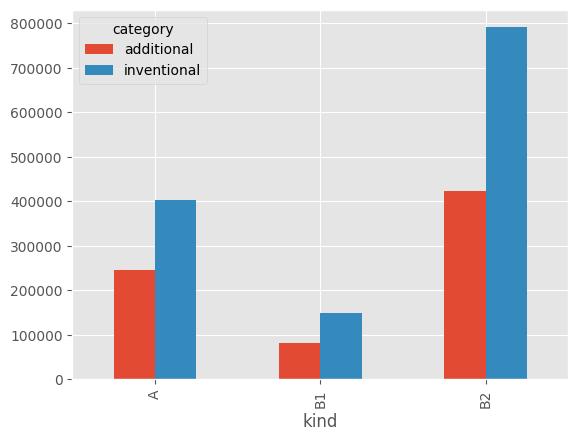

In [57]:
#kind vs category
pd.crosstab(index=vkind.filter(axis = 0, items = use),columns=vcategory.filter(axis = 0, items = use)).plot(kind="bar");

<AxesSubplot: xlabel='issue_date_form'>

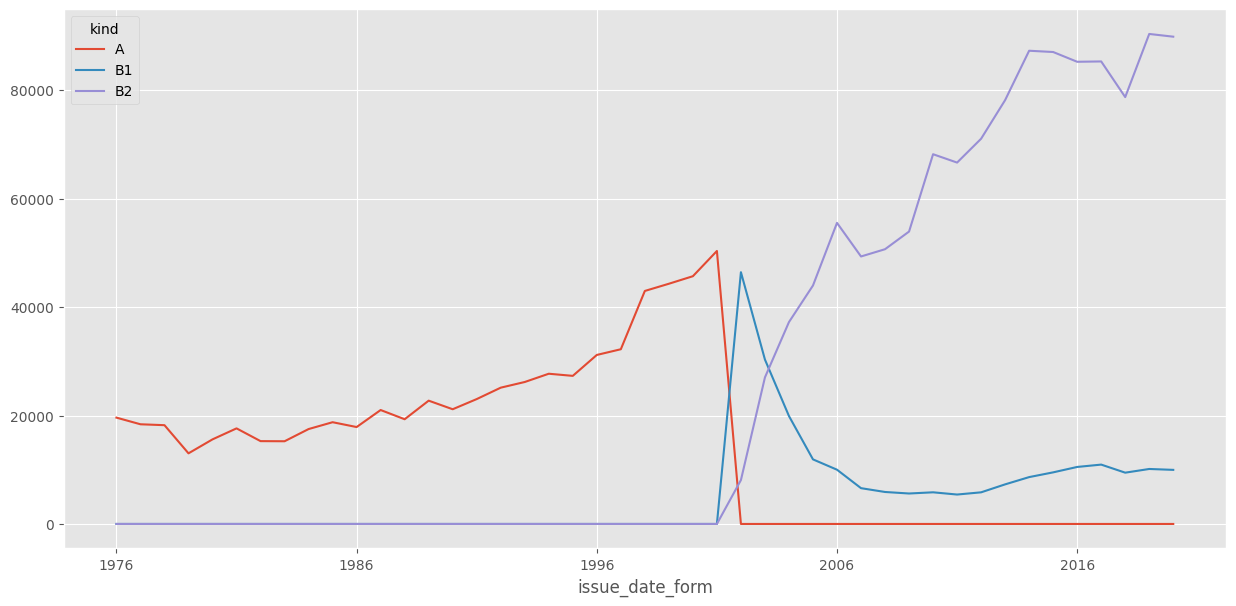

In [84]:
#date vs kind
#pd.crosstab(index=vdate.filter(axis = 0, items = use),columns=vkind.filter(axis = 0, items = use)).plot(kind="line", figsize=(15,7))#,width = 1);

<AxesSubplot: xlabel='issue_date_form'>

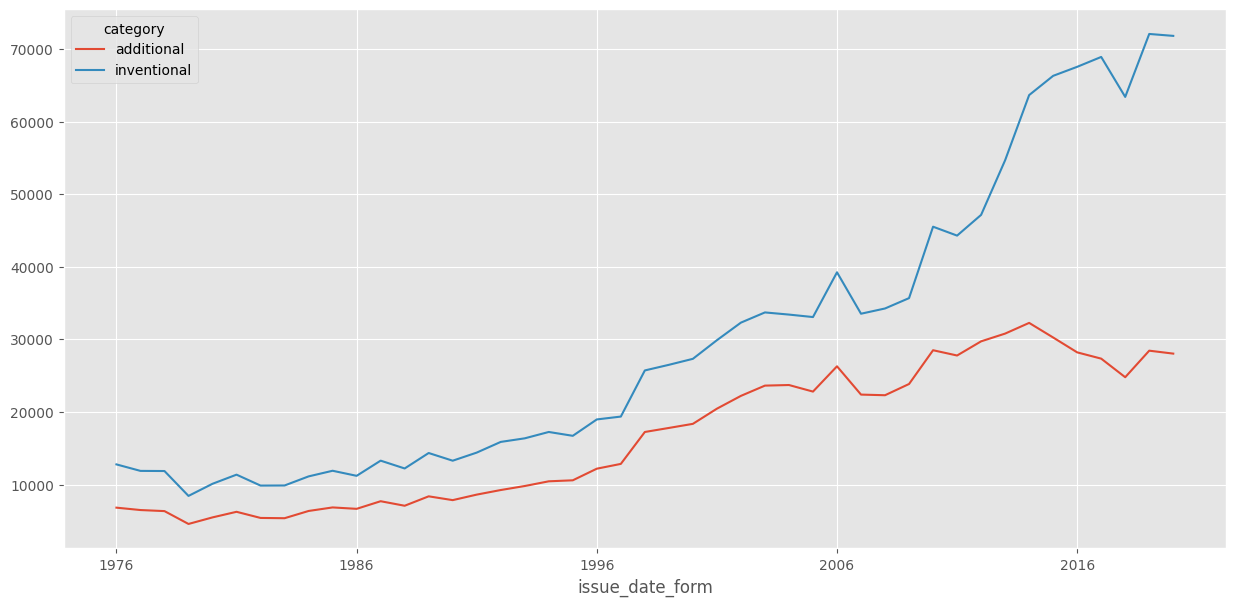

In [85]:
#DATE VS SECTIONS
pd.crosstab(index= vdate,columns=vcategory).plot(kind="line", figsize=(15,7))#,width = 0.75 ,color=color);

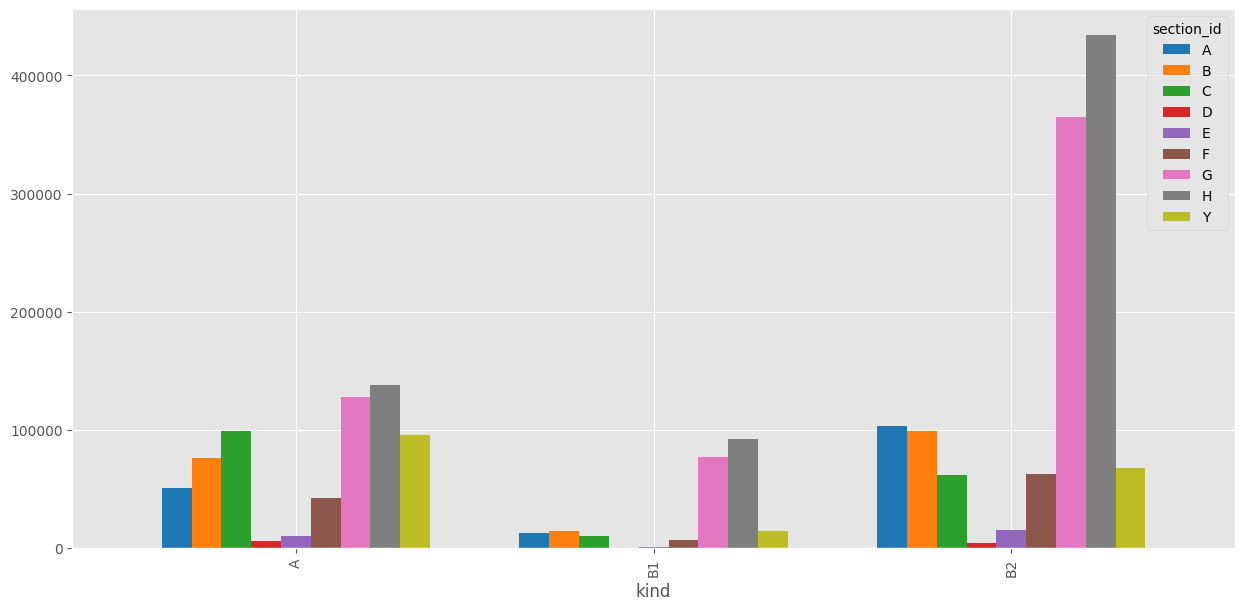

In [59]:
#kind vs section
color = sns.color_palette("tab10", n_colors=len(np.unique(vsection)))
pd.crosstab(index=vkind.filter(axis = 0, items = use),columns=vsection.filter(axis = 0, items = use)).plot(kind="bar", figsize=(15,7),width = 0.75 ,color=color);

### Categorical vs Numerical

In [64]:
num.columns

Index(['number', 'num_claims', 'withdrawn', 'xi_real', 'xi_nominal', 'cites',
       'permno'],
      dtype='object')

In [88]:
df["issue_date"] = cat_analysis.issue_date_form

In [67]:
cat_analysis.columns

Index(['type', 'kind', 'section_id', 'group_id', 'category', 'issue_date_form',
       'withdrawn'],
      dtype='object')

In [114]:
def plot_cat_vs_num(df,cat,num, kind="bar"):
    
    fig, ax = plt.subplots(1,2, figsize = (18,5))
    
    
    df.loc[:,(cat, num)].groupby(cat).mean().plot(kind=kind, ax = ax[0])
    ax[0].set_title(f"Mean {num} by {cat}")
    
    
    df.loc[:,(cat, num)].boxplot(by= cat , ax = ax[1])
    ax[1].set_title(f"Boxplot of {num} by {cat}")
    ax[1].set_xlabel(f"{cat}")
    ax[1].set_xticks([])
    fig.suptitle("")
    

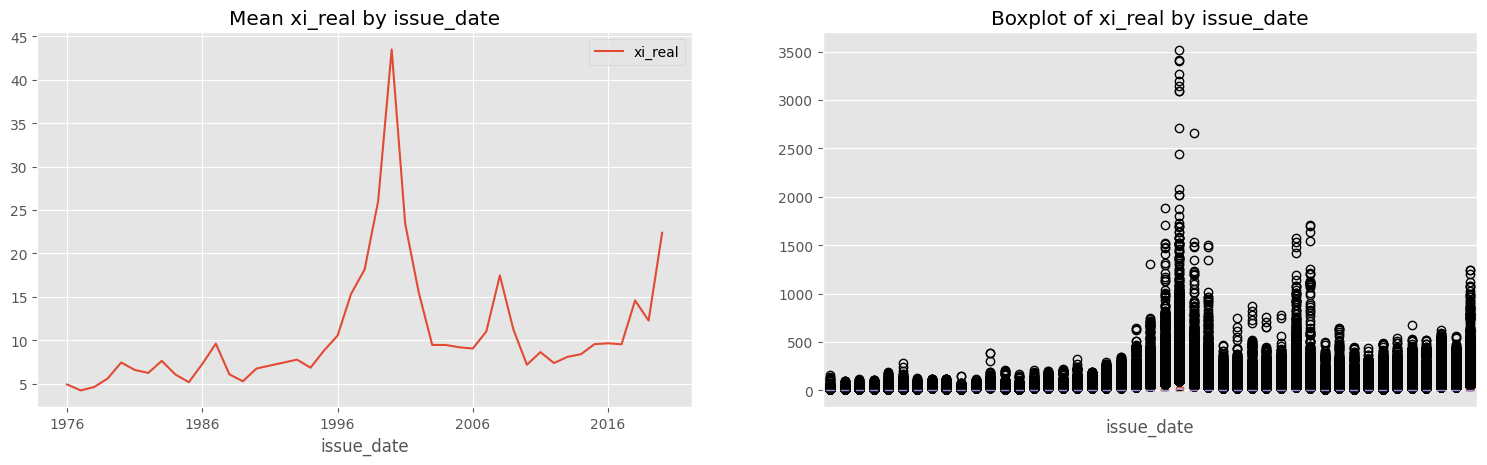

In [115]:
plot_cat_vs_num(df,"issue_date","xi_real", kind="line")

In [242]:
num.columns

Index(['number', 'num_claims', 'withdrawn', 'xi_real', 'xi_nominal', 'cites',
       'permno'],
      dtype='object')

## Numerical vs Numerical

In [20]:
def plot_num_vs_num(df,num1,num2):
    
    df_fil = df.loc[:,(num1,num2)]
    
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    
    ax[0].scatter(df_fil[num1], df_fil[num2])
    ax[0].set_xlabel(f"{num1}")
    ax[0].set_ylabel(f"{num2}")
    ax[0].set_title("Scatter plot")
    
    cor = np.corrcoef(df_fil[num1], df_fil[num2])
    color = sns.color_palette("vlag", as_cmap=True)
    sns.heatmap(cor, ax= ax[1], vmin = -1, vmax= 1, annot=True, cmap = color)
    ax[1].set_title(f"Correlation matrix {num1} vs {num2}")
    ax[1].set_xlabel(f"{num1}")
    ax[1].set_ylabel(f"{num2}")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

Da fare nella giornata di oggi i plot e scrivere l'intera parte sul word

In [139]:
num.columns

Index(['number', 'num_claims', 'withdrawn', 'xi_real', 'xi_nominal', 'cites',
       'permno'],
      dtype='object')

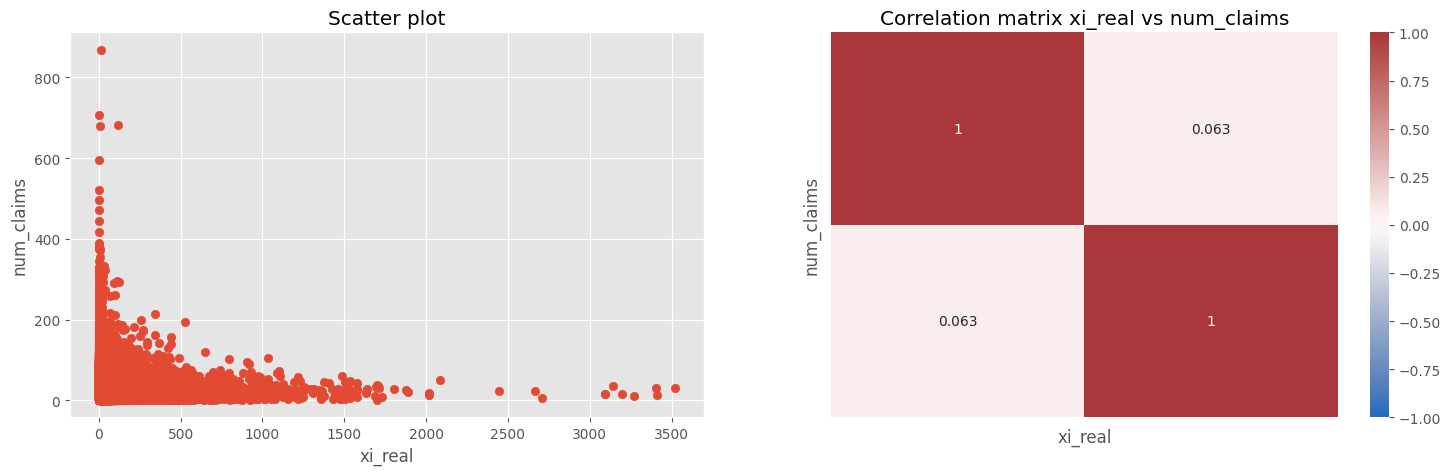

In [22]:
plot_num_vs_num(df,"xi_real","num_claims")

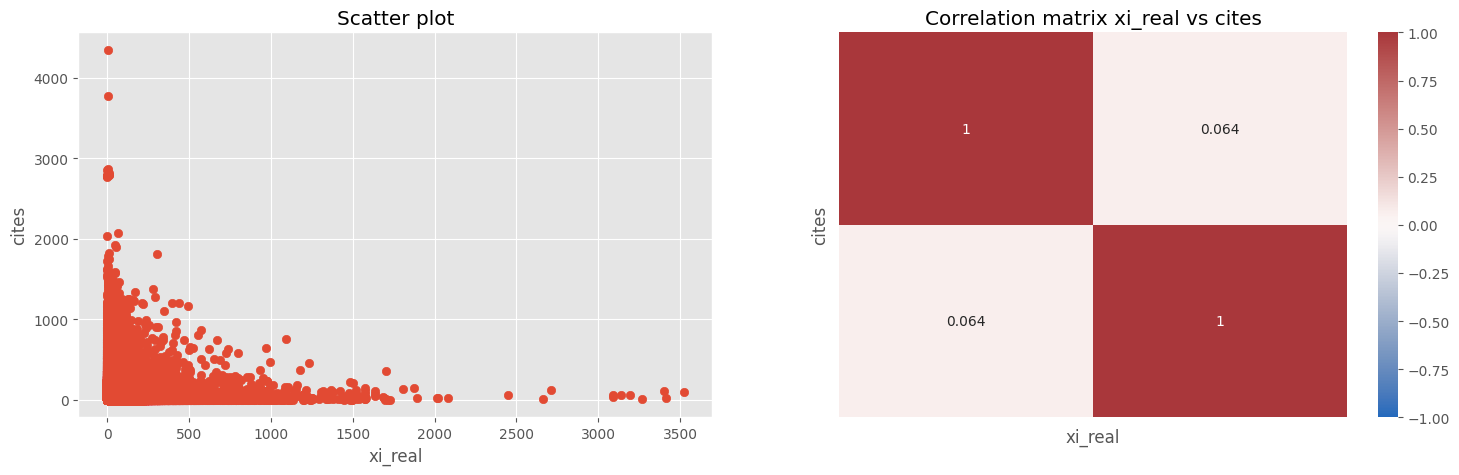

In [24]:
plot_num_vs_num(df,"xi_real","cites")

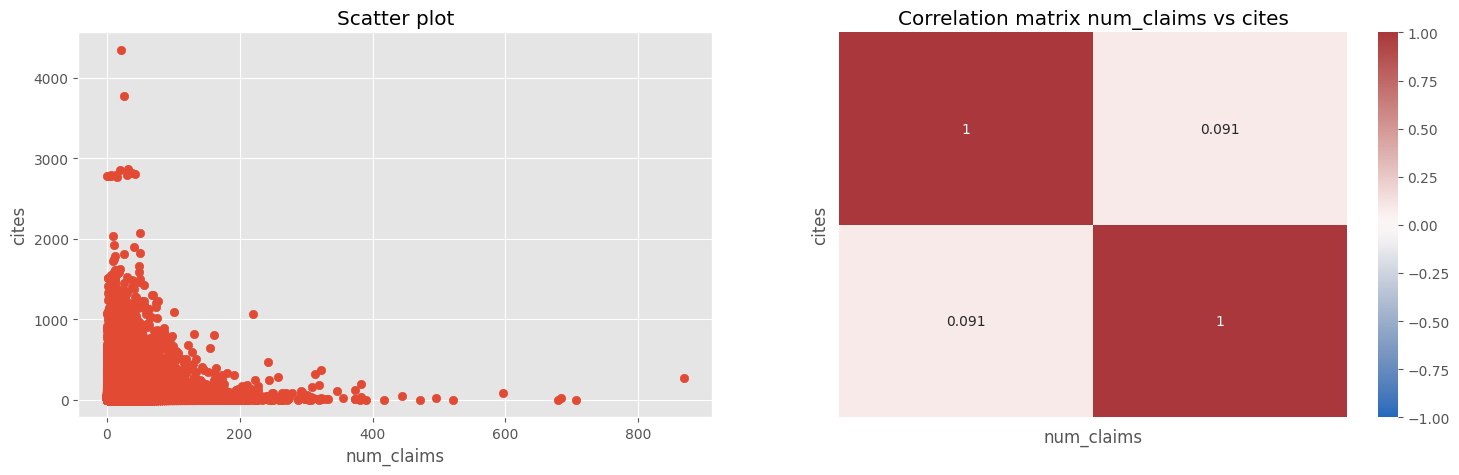

In [25]:
plot_num_vs_num(df,"num_claims","cites")

# Useful insight

In [29]:
os.getcwd()

'c:\\Users\\laudi\\OneDrive\\Desktop\\Tesi_workspace\\repository\\2 analysis'

In [43]:
df[df.cites==df.cites.max()].loc[:,("title" ,"cites")].to_csv(r"csv_numerical\max_cites.csv")

In [44]:
df.columns

Index(['type', 'number', 'country', 'date', 'abstract', 'title', 'kind',
       'num_claims', 'filename', 'withdrawn', 'section_id', 'subsection_id',
       'group_id', 'subgroup_id', 'category', 'xi_real', 'xi_nominal', 'cites',
       'permno', 'issue_date', 'filing_date'],
      dtype='object')